In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("happiness_score.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.isnull().sum()
#checking null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [6]:
df.drop(columns=["Happiness Rank","Standard Error","Generosity","Country","Region"],axis=1,inplace=True)
#dropping not useful columns

In [8]:
df.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Dystopia Residual               -0.238911
dtype: float64

In [19]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3
df=df[(z < 3).all(axis=1)]
#removing outliers

In [20]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>1:
        df[col]=np.log1p(df[col])
#removing skewness

In [21]:
df.skew()


Happiness Score                  0.188432
Economy (GDP per Capita)        -0.388103
Family                          -0.794362
Health (Life Expectancy)        -0.725418
Freedom                         -0.397744
Trust (Government Corruption)    0.902458
Dystopia Residual               -0.031212
dtype: float64

In [22]:
df.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,5.400278,0.847546,1.004884,0.631667,0.425740,0.111778,2.121960
std,1.092346,0.388977,0.251036,0.242962,0.149423,0.077034,0.527176
min,2.905000,0.000000,0.302850,0.000000,0.000000,0.000000,0.654290
25%,4.568000,0.568575,0.866785,0.453880,0.324650,0.056171,1.789240
50%,5.253000,0.918510,1.035160,0.696390,0.434500,0.095178,2.110320
75%,6.149000,1.152900,1.217935,0.810425,0.544070,0.148941,2.459520
max,7.587000,1.563910,1.402230,1.013280,0.669730,0.310098,3.602140


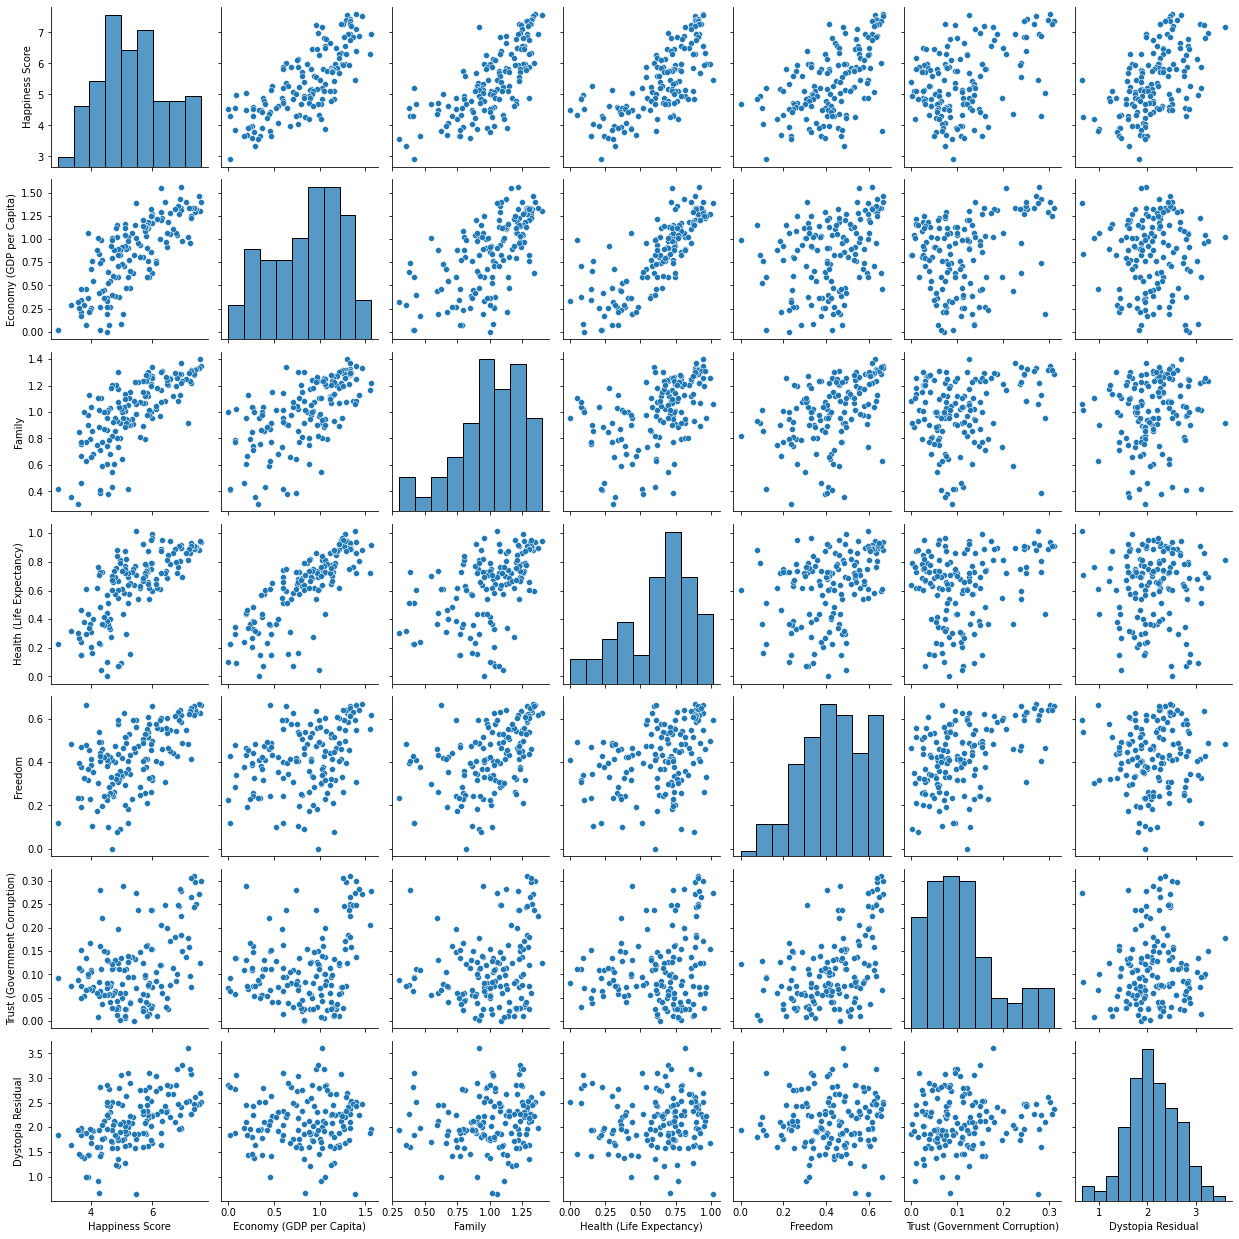

In [23]:
sns.pairplot(df)

In [24]:
x=df.drop("Happiness Score",axis=1)
y=df["Happiness Score"]

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 70)

In [27]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [28]:
print("r2_score is:",r2_score(y_test,y_pred))
#overfitting 

r2_score is: 0.9867967335118184


In [29]:
cross_val_score(lr,x,y,cv=5,scoring="r2").mean()
#value is less 

0.7255136384411722

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=70)
regressor.fit(x_train,y_train)
y_pred_=regressor.predict(x_test)
r2_scr=r2_score(y_test,y_pred_)
r2_scr
#using decision tree to predict

0.8695536747347413

In [40]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
print("r2_score",r2_score(y_test,pred))
#using knn regressor

r2_score 0.9485527752624769


In [41]:
import joblib
joblib.dump(model,"world_happiness_report.pkl")

['world_happiness_report.pkl']